<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/TCC_Insumo_1_TH_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm

# importa o data set
from google.colab import files
uploaded = files.upload()


Saving Insumo 1 - FH 1d.xlsx to Insumo 1 - FH 1d.xlsx


In [48]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Insumo 1 - FH 1d.xlsx']))
df

,Data,Nível Insumo 1 (%)
0,2018-02-10 06:59:59.995,57.938202
1,2018-02-11 06:59:59.995,55.592258
2,2018-02-12 06:59:59.995,52.618847
3,2018-02-13 06:59:59.995,49.863560
4,2018-02-14 06:59:59.995,46.807827
...,...,...
1537,2022-04-27 06:59:59.995,30.178921
1538,2022-04-28 06:59:59.995,27.904236
1539,2022-04-29 06:59:59.995,26.226900
1540,2022-04-30 06:59:59.995,23.799892


In [49]:
!pip install sktime
from sktime.utils.plotting import plot_series

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
df.head()

,Data,Nível Insumo 1 (%)
0,2018-02-10 06:59:59.995,57.938202
1,2018-02-11 06:59:59.995,55.592258
2,2018-02-12 06:59:59.995,52.618847
3,2018-02-13 06:59:59.995,49.863560
4,2018-02-14 06:59:59.995,46.807827


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                1542 non-null   datetime64[ns]
 1   Nível Insumo 1 (%)  1542 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.2 KB


In [52]:
#Setting date as the index
df.set_index('Data', inplace=True, drop=True)

In [53]:
#Nível Insumo 1 column as an object due to error values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Nível Insumo 1 (%)
Data,


In [54]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [55]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1542 entries, 2018-02-10 06:59:59.995000 to 2022-05-01 06:59:59.995000
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nível Insumo 1 (%)  1542 non-null   float64
dtypes: float64(1)
memory usage: 24.1 KB


In [57]:
import matplotlib
matplotlib.style.use('ggplot')

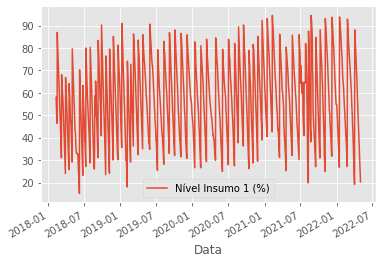

In [58]:
 df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0084957d0>]],
      dtype=object)

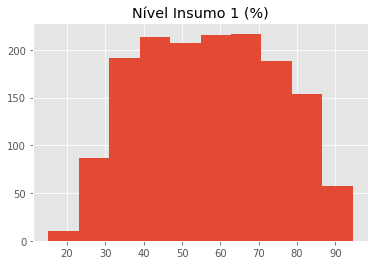

In [59]:
df.hist()

CHECKING DATA STATIONARITY

In [60]:
#p-value <= 0,05 data is stationary
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = df.iloc[:,0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.730470
p-value: 0.000000


SEPARATING IN TRAIN AND TEST IN ORDER TO EVALUATE PREDICTION MODEL

In [61]:
#First we need to ensure DF frequency is D
df = df.resample('D').mean() 

In [62]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [63]:
df.index

DatetimeIndex(['2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
               '2018-02-18', '2018-02-19',
               ...
               '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-04-30', '2022-05-01'],
              dtype='datetime64[ns]', name='Data', length=1542, freq='D')

In [64]:
y = df
y_train, y_test = temporal_train_test_split(y, test_size=300)
# we will try to forecast y_test from y_train

1242 300


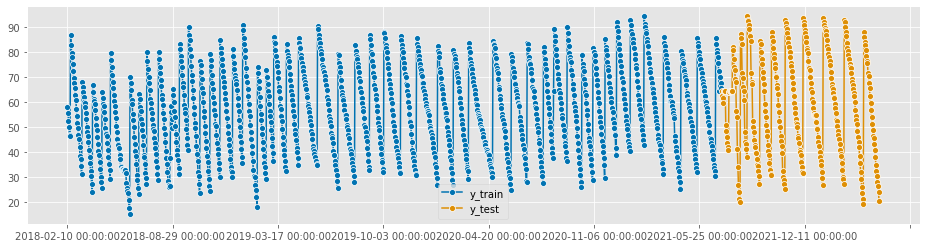

In [65]:
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [66]:
# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
               '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13',
               '2021-07-14', '2021-07-15',
               ...
               '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-04-30', '2022-05-01'],
              dtype='datetime64[ns]', length=300, freq='D', is_relative=False)

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


0.4998798355868301

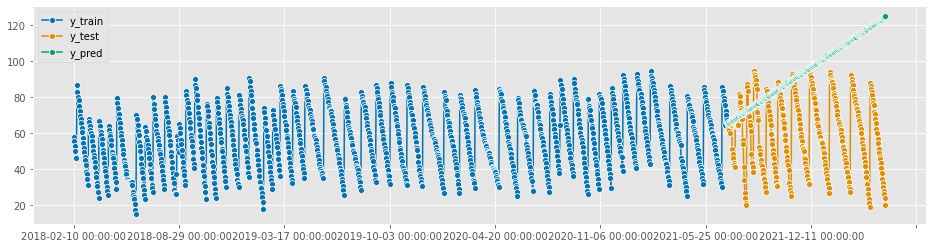

In [67]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=2)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


0.3042546380177014

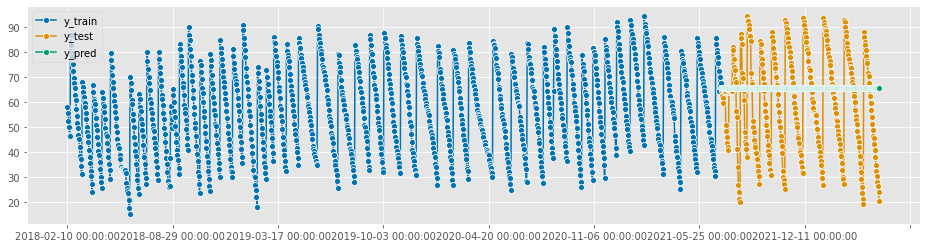

In [68]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [69]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

Mean Absolute Percentage Error (MAPE): Nível Insumo 1 (%)    40.4
dtype: float64 %
Median Absolute Percentage Error (MDAPE): 24.56 %


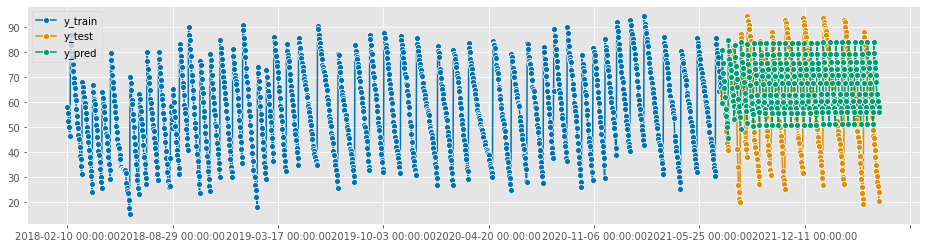

In [71]:
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA(
    order=(1, 0, 0), seasonal_order=(1, 1, 0, 12), suppress_warnings=True
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)
# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test, y_pred)/y_test))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')
# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test, y_pred)/ y_test)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

In [72]:
print(y_pred,y_test)

            Nível Insumo 1 (%)
2021-07-06           59.791261
2021-07-07           80.947599
2021-07-08           75.555207
2021-07-09           71.834805
2021-07-10           68.627908
...                        ...
2022-04-27           59.296830
2022-04-28           63.350753
2022-04-29           60.609700
2022-04-30           58.036978
2022-05-01           56.149476

[300 rows x 1 columns]             Nível Insumo 1 (%)
2021-07-06           64.685699
2021-07-07           62.457829
2021-07-08           61.709972
2021-07-09           59.832401
2021-07-10           64.583038
...                        ...
2022-04-27           30.178921
2022-04-28           27.904236
2022-04-29           26.226900
2022-04-30           23.799892
2022-05-01           20.288765

[300 rows x 1 columns]


PREDICTION FOR NEXT 5 DAYS

In [73]:
fh = np.arange(1, 13)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [74]:
# this is the data known in December 1957
y_past = y[:-30]

# step 1: specifying the forecasting strategy
forecaster = ARIMA(
    order=(1, 0, 0), seasonal_order=(1, 1, 0, 12), suppress_warnings=True
)

# step 2: specifying the forecasting horizon: one year ahead, all months
fh = np.arange(1, 5)

# step 3: this is the first time we use the model, so we fit it
forecaster.fit(y_past)

# step 4: obtaining the first batch of forecasts for Jan 1958 - Dec 1958
y_pred_past = forecaster.predict(fh)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)


In [75]:
y_pred_past

,Nível Insumo 1 (%)
2022-04-02,24.652480
2022-04-03,28.683740
2022-04-04,32.396474
2022-04-05,34.960139


In [76]:
# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
               '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13',
               '2021-07-14', '2021-07-15',
               ...
               '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-04-30', '2022-05-01'],
              dtype='datetime64[ns]', length=300, freq='D', is_relative=False)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

0.4546380407624573

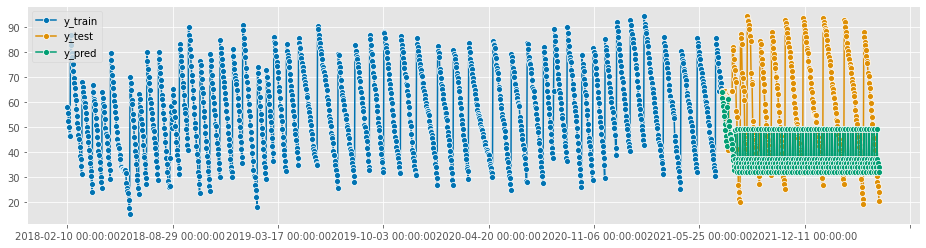

In [77]:
from sklearn.neighbors import KNeighborsRegressor 
from sktime.forecasting.compose import make_reduction 
regressor = KNeighborsRegressor(n_neighbors=3) 
forecaster = make_reduction(regressor, window_length=4, strategy="recursive") 
forecaster.fit(y_train) 
y_pred = forecaster.predict(fh) 
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]) 
mean_absolute_percentage_error(y_pred, y_test)

In [78]:
print(y_pred,y_test)

            Nível Insumo 1 (%)
2021-07-06           63.932575
2021-07-07           61.627295
2021-07-08           59.818568
2021-07-09           58.462219
2021-07-10           56.567399
...                        ...
2022-04-27           49.199352
2022-04-28           37.272271
2022-04-29           35.722347
2022-04-30           34.077770
2022-05-01           32.020944

[300 rows x 1 columns]             Nível Insumo 1 (%)
2021-07-06           64.685699
2021-07-07           62.457829
2021-07-08           61.709972
2021-07-09           59.832401
2021-07-10           64.583038
...                        ...
2022-04-27           30.178921
2022-04-28           27.904236
2022-04-29           26.226900
2022-04-30           23.799892
2022-05-01           20.288765

[300 rows x 1 columns]


In [79]:
import numpy as np
fh = np.arange(1, 5)
fh

array([1, 2, 3, 4])

In [80]:
regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, window_length=4, strategy="recursive")
forecaster.fit(y)

# step 4: obtaining the first batch of forecasts for Jan 1958 - Dec 1958
y_pred = forecaster.predict(fh)

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:105: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if not hasattr(x, "freq") or x.freq is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:107: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  by *= x.freq
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)


In [82]:
y_pred

,Nível Insumo 1 (%)
2022-05-02,18.262812
2022-05-03,83.235842
2022-05-04,81.213135
2022-05-05,80.741346
